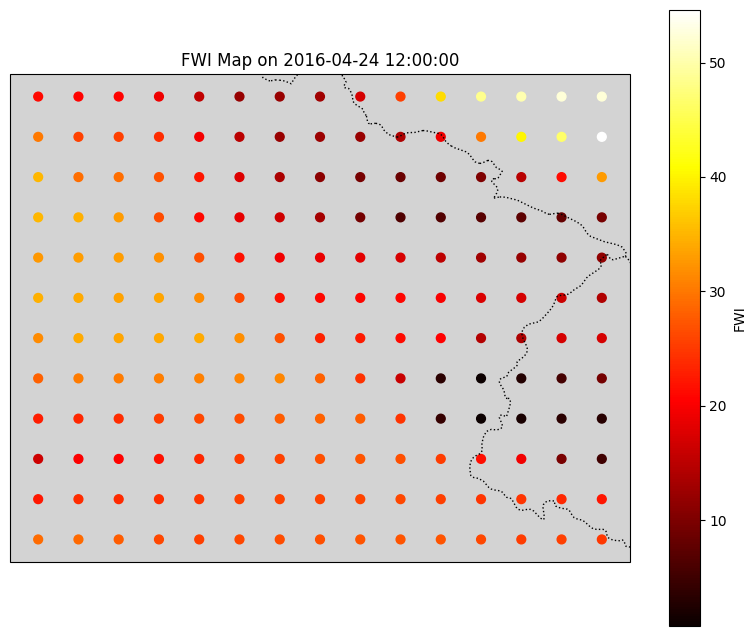

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load dataset
df = pd.read_csv(r"C:\Users\Admin\Desktop\Codes\ISRO\data_2016_FWI.csv")

# Ensure date column is datetime
df['valid_time'] = pd.to_datetime(df['valid_time'])

# Filter for specific date
day_data = df[df['valid_time'] == "2016-05-31 12:00:00	"]

# Plot
plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

sc = plt.scatter(
    day_data['longitude'], day_data['latitude'],
    c=day_data['FWI'], cmap='hot', s=40,
    transform=ccrs.PlateCarree()
)

plt.colorbar(sc, label="FWI")
plt.title("FWI Map on 2016-04-24 12:00:00")
plt.show()


In [6]:
df.loc[df['FWI'] == df['FWI'].max()] 

,Unnamed: 0,valid_time,latitude,longitude,u10,v10,d2m,t2m,tp,temp_C,dew_C,humidity,temp,wind_speed,rainfall,day,month,FWI
27209,27209,2016-05-31 12:00:00,30.94,80.85,6.136099,-1.406116,244.31075,286.10962,0.0,12.95962,-28.83925,3.812656,12.95962,6.295147,0.0,31,5,54.593275


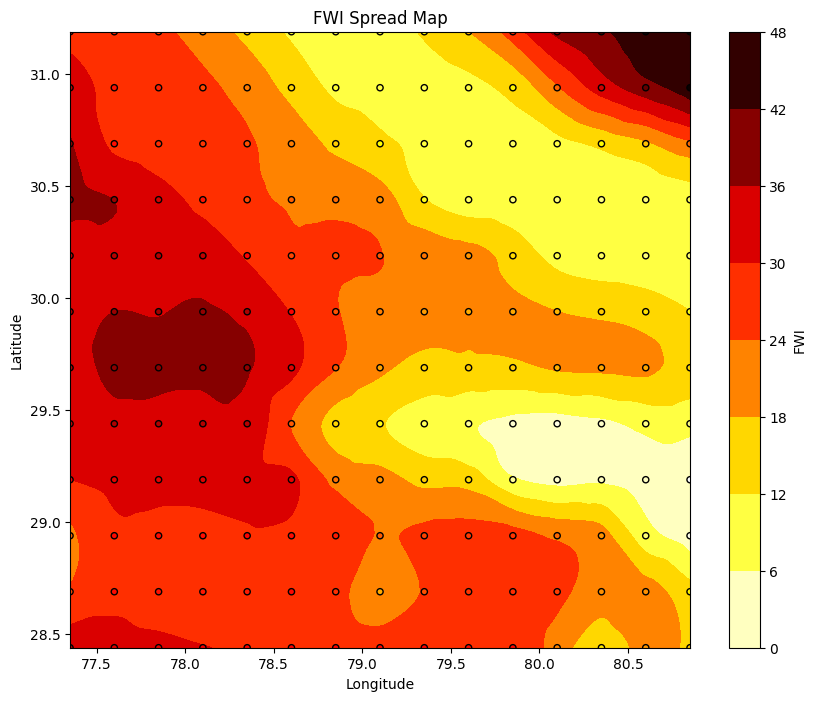

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\Admin\Desktop\Codes\ISRO\data_2016_FWI.csv")
df['valid_time'] = pd.to_datetime(df['valid_time'])

# Filter specific date
day_data = df[df['valid_time'] == "2016-05-28 12:00:00"]

# Extract coordinates and values
lon = day_data['longitude'].values
lat = day_data['latitude'].values
fwi = day_data['FWI'].values

# Create grid
grid_lon, grid_lat = np.meshgrid(
    np.linspace(lon.min(), lon.max(), 200),
    np.linspace(lat.min(), lat.max(), 200)
)

# Interpolate values onto grid
grid_fwi = griddata((lon, lat), fwi, (grid_lon, grid_lat), method='cubic')

# Plot contour map
plt.figure(figsize=(10,8))
contour = plt.contourf(grid_lon, grid_lat, grid_fwi, cmap='hot_r')
plt.colorbar(contour, label="FWI")
plt.scatter(lon, lat, c=fwi, cmap='hot_r', edgecolor='k', s=20)  
plt.title("FWI Spread Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()




In [9]:
!pip install imageio


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import imageio
import os

# Load dataset
df = pd.read_csv(r"C:\Users\Admin\Desktop\Codes\ISRO\data_2016_FWI.csv")
df['valid_time'] = pd.to_datetime(df['valid_time'])

# Filter one week at 00:00:00
start_date = "2016-04-24 00:00:00"
end_date   = "2016-05-31 00:00:00"
week_data = df[(df['valid_time'] >= start_date) & (df['valid_time'] <= end_date)]
week_data = week_data[week_data['valid_time'].dt.hour == 12]  # only 00:00:00

frames = []
out_dir = "/mnt/data/fwi_frames"
os.makedirs(out_dir, exist_ok=True)

for day in sorted(week_data['valid_time'].unique()):
    day_data = week_data[week_data['valid_time'] == day]

    lon = day_data['longitude'].values
    lat = day_data['latitude'].values
    fwi = day_data['FWI'].values

    # Create grid
    grid_lon, grid_lat = np.meshgrid(
        np.linspace(lon.min(), lon.max(), 200),
        np.linspace(lat.min(), lat.max(), 200)
    )
    grid_fwi = griddata((lon, lat), fwi, (grid_lon, grid_lat), method='cubic')

    # Plot
    plt.figure(figsize=(8,6))
    plt.contourf(grid_lon, grid_lat, grid_fwi, cmap="hot_r")
    plt.colorbar(label="FWI")
    plt.scatter(lon, lat, c=fwi, cmap="hot_r", edgecolor="k", s=15)
    plt.title(f"FWI Spread on {day.strftime('%Y-%m-%d')}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # Save frame
    frame_path = f"{out_dir}/{day.strftime('%Y%m%d')}.png"
    plt.savefig(frame_path)
    plt.close()
    frames.append(imageio.imread(frame_path))

# Create GIF
gif_path = "C:/Users/Admin/Desktop/Codes/ISRO/FWI_week.gif"
imageio.mimsave(gif_path, frames, duration=1.0)  # 1s per frame

print(f"GIF saved at {gif_path}")


C:\Users\Admin\AppData\Local\Temp\ipykernel_9052\1286045777.py:49: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_path))


GIF saved at C:/Users/Admin/Desktop/Codes/ISRO/FWI_week.gif
